# 온라인 및 오프라인 플랫폼과 구매 기록 간의 상관 관계
- t_dat(구매 일자)
- customer_id(고객 id)
- article_id(제품 번호)
- price(가격)
- sales_channel_id(온/오프라인  1오프라인,2온라인)

# 온라인 고객수와 오프라인 고객수 시각화

In [1]:
df_clothes_name = pd.read_csv(r'D:\머신러닝 프로젝트\data\df_colthes_name.csv')
df_clothes_name.head(4)

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,graphical_appearance_name,perceived_colour_master_name,garment_group_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater,Melange,Pink,Knitwear


In [2]:
transactions_train = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\transactions_train.csv')
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


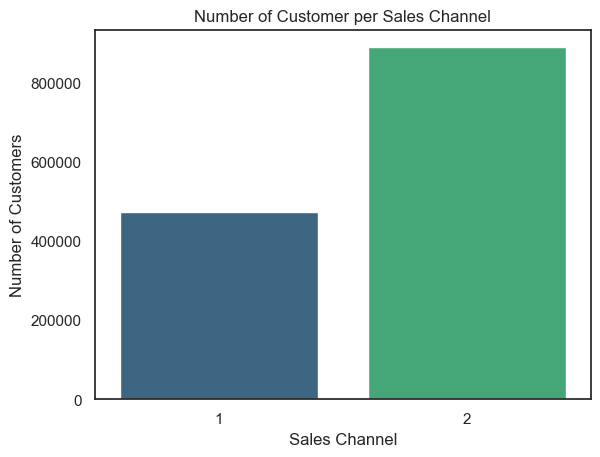

In [3]:
#customer_id 중복을 제거하여 온, 오프라인 고객 시각화
channel_customer_counts = transactions_train.drop_duplicates('customer_id').groupby('sales_channel_id').size()

sns.barplot(x= channel_customer_counts.index, y=channel_customer_counts.values, palette="viridis")
plt.ylabel('Number of Customers')
plt.xlabel('Sales Channel')
plt.title('Number of Customer per Sales Channel')
plt.show()            

# 온라인 고객의 구매량이 정말 많은지 확인하기

In [4]:
# 불필요 컬럼 삭제
df_clothes_name = df_clothes_name.drop(['graphical_appearance_name','perceived_colour_master_name','garment_group_name'],axis=1)
df_clothes_name

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name
0,2018-09-20,7,32.0,505221004,0.015237,Inca Jumper,Sweater
1,2018-09-20,83749,53.0,505221004,0.015237,Inca Jumper,Sweater
2,2018-09-20,87205,23.0,505221004,0.015237,Inca Jumper,Sweater
3,2018-09-20,332514,23.0,505221004,0.015237,Inca Jumper,Sweater
4,2018-09-20,501565,22.0,505221004,0.015237,Inca Jumper,Sweater
...,...,...,...,...,...,...,...
22477262,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers
22477263,2020-09-22,309856,50.0,886270008,0.045746,Balloon Pleat fit,Trousers
22477264,2020-09-22,1267138,36.0,860135008,0.038119,Pat ls bd plaid,Shirt
22477265,2020-09-22,1267138,36.0,539060028,0.016017,TP BOSSE fancy OH hood SB,Hoodie


In [5]:
# concat 사용 
#merger를 할려고 했으나 400기가? 메모리를 요구하기에 concat 사용했습니다(결측치는 어쩔수가 없다!)

concat_df = pd.concat([df_clothes_name, transactions_train], axis=0, ignore_index=True)

concat_df

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,customer_id,sales_channel_id
0,2018-09-20,7.0,32.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
1,2018-09-20,83749.0,53.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
2,2018-09-20,87205.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
3,2018-09-20,332514.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
4,2018-09-20,501565.0,22.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
...,...,...,...,...,...,...,...,...,...
54265586,2020-09-22,NaN,NaN,929511001,0.059305,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265587,2020-09-22,NaN,NaN,891322004,0.042356,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265588,2020-09-22,NaN,NaN,918325001,0.043203,NaN,NaN,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1.0
54265589,2020-09-22,NaN,NaN,833459002,0.006763,NaN,NaN,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1.0


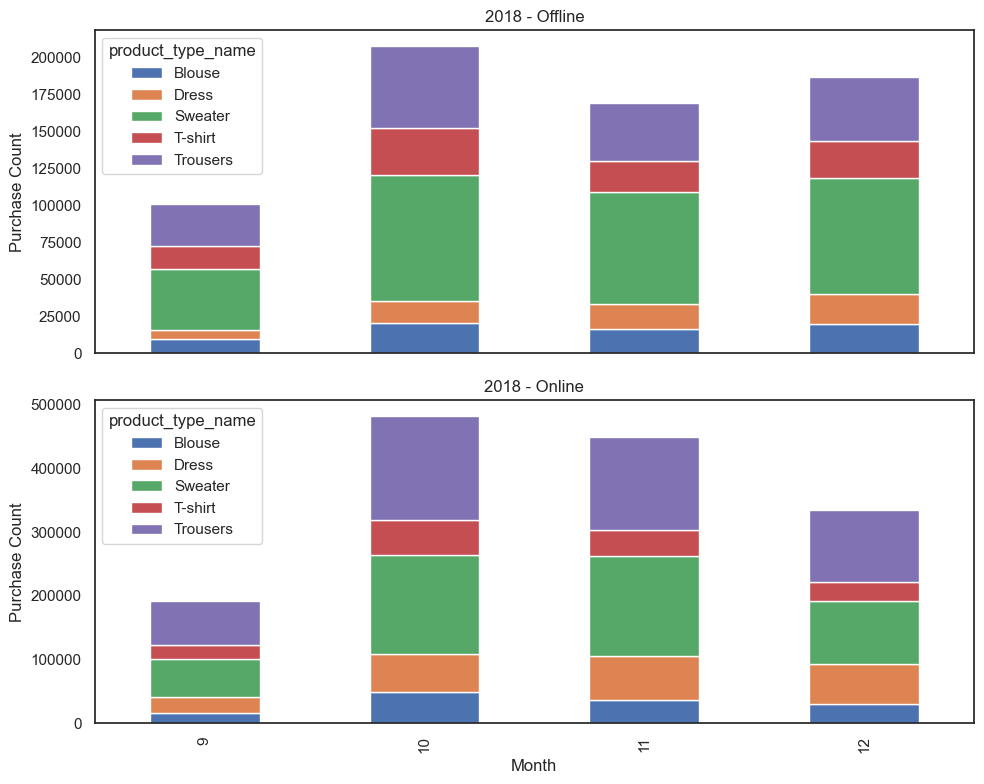

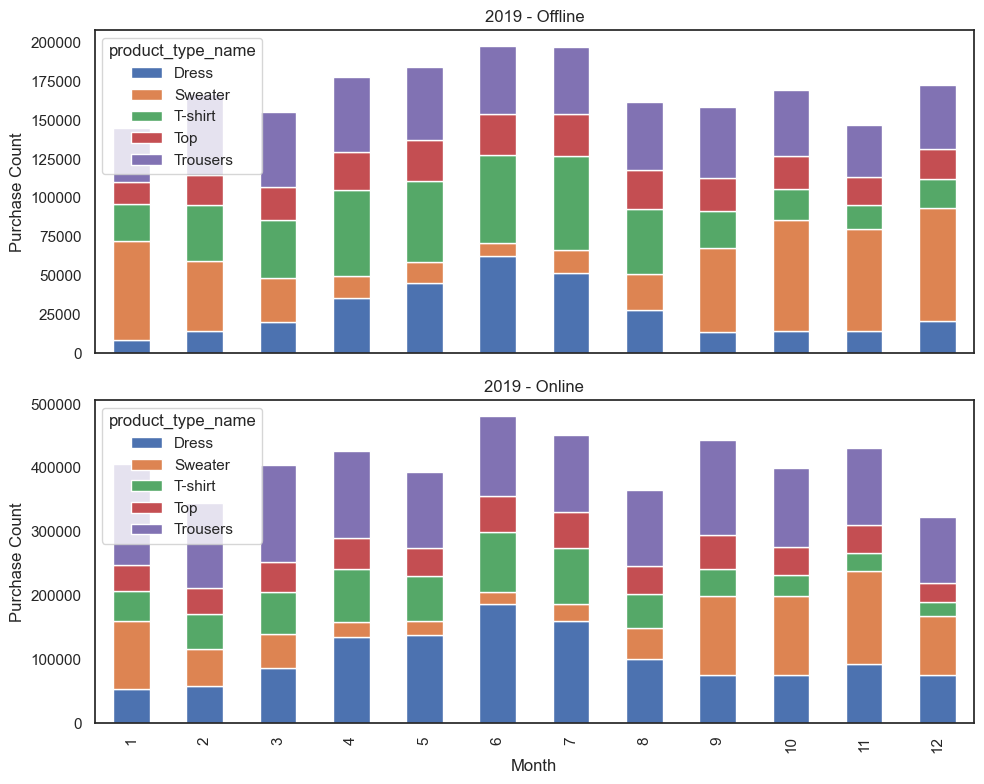

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
article_to_product_type = pd.Series(df_clothes_name.product_type_name.values, index=df_clothes_name.article_id).to_dict()

transactions_train['product_type_name'] = transactions_train['article_id'].map(article_to_product_type)

transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
transactions_train['year'] = transactions_train['t_dat'].dt.year
transactions_train['month'] = transactions_train['t_dat'].dt.month


transactions_train = transactions_train.dropna(subset=['product_type_name'])


grouped = transactions_train.groupby(['year', 'month', 'sales_channel_id', 'product_type_name']).size().reset_index(name='purchase_count')
data_2018 = grouped[grouped['year'] == 2018]
data_2019 = grouped[grouped['year'] == 2019]

def plot_purchase_data(data, year):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    for i, channel in enumerate([1, 2]):
        channel_data = data[data['sales_channel_id'] == channel]
        top_products = channel_data.groupby('product_type_name')['purchase_count'].sum().nlargest(5).index
        channel_data_top_products = channel_data[channel_data['product_type_name'].isin(top_products)]
        pivot_data = channel_data_top_products.pivot(index='month', columns='product_type_name', values='purchase_count')
        pivot_data.plot(kind='bar', stacked=True, ax=ax[i])
        ax[i].set_title(f"{year} - {'Offline' if channel == 1 else 'Online'}")
        ax[i].set_ylabel('Purchase Count')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

# 시각화 수행
plot_purchase_data(data_2018, 2018)
plot_purchase_data(data_2019, 2019)

# dfd

In [9]:
concat_df

,t_dat,customer_label,age,article_id,price,prod_name,product_type_name,customer_id,sales_channel_id
0,2018-09-20,7.0,32.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
1,2018-09-20,83749.0,53.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
2,2018-09-20,87205.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
3,2018-09-20,332514.0,23.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
4,2018-09-20,501565.0,22.0,505221004,0.015237,Inca Jumper,Sweater,NaN,NaN
...,...,...,...,...,...,...,...,...,...
54265586,2020-09-22,NaN,NaN,929511001,0.059305,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265587,2020-09-22,NaN,NaN,891322004,0.042356,NaN,NaN,fff2282977442e327b45d8c89afde25617d00124d0f999...,2.0
54265588,2020-09-22,NaN,NaN,918325001,0.043203,NaN,NaN,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1.0
54265589,2020-09-22,NaN,NaN,833459002,0.006763,NaN,NaN,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1.0


In [15]:
transactions_train = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\transactions_train.csv')
customer = pd.read_csv(r'D:\머신러닝 프로젝트\h-and-m-personalized-fashion-recommendations (1)\customers.csv')

In [19]:
age_listbin = [15, 19, 29, 39, 49, 59, 69, 79, 89, 99]
customer['generation'] =  pd.cut(customer['age'], age_listbin, 
                                        labels = ['10s', '20s', '30s','40s', '50s', '60s', '70s', '80s', '90s'])
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,generation
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,40s
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,20s
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,50s
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,50s


In [21]:
customers1or0 = customer[((customer['FN']== 0.0) & (customer['Active'] == 1.0)) | ((customer['FN']== 1.0) & (customer['Active'] == 0.0))]
customers1or0.head()

NameError: name 'customers1or00' is not defined